# Parental Involvement and Student Performance 

## Objective

[In an earlier study](https://github.com/anilca-lab/FIS-Mod3-Project), Steven Dye and I tested the hypothesis that student performance is correlated with parental engagement. Using data from the Parent and Family Involvement in Education Survey (2016), we found that higher parental engagement was related with better grades.

<img src="school-involvement.png"> <img src="home-involvement.png">

The following takes this preliminary analysis a step further by controlling for the confounding variables that might be correlated with both parental engagement and student performance. These variables include school, parent, and student characteristics. 

## Data Preparation

As in the preliminary analysis, I used data from the Parent and Family Involvement in Education Survey (2016). The data was collected as a part of the National Household Education Survey Program, by the National Center for Education Statistics. The survey covered children from grades kindergarten to 12th grade and asks various questions about the child's performance at school, involvement of the parents, as well as other parent, child, and school characteristics. The survey was filled out by the parents (or guardians) and the data was compiled in a csv file with 822 columns and 14075 entries. The data was nationally representative and used a two-stage addressed-based sampling.

### First step

The initial data preparation included dropping the parts related to home-schooled children, recoding the ordinal features when necessary to reflect continuity, and handling missing values. I used the following approach:

    1. When the number of missing values was large, I dropped the feature.
    2. When the number of missing values was small, I dropped these observations.
    3. For categorical features, I maintained the missing values as a seperate category.

This gave me a total of 13,095 observations.

I identified four groups of features as listed below:

    1. School characteristics
    2. Parent characteristics
    3. Student characteristics
    4. Parental involvement

170 features in total, 42 of them continuous. 

I also identified 13 potential target variables.

In [86]:
%run data_prep.py

In [87]:
y_df, school_characteristics_df, parent_characteristics_df, student_characteristics_df, parental_involvement_df, X_cont_labels = select_feats()

In [7]:
y_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEENJOY,13095.0,1.752195,0.700917,1.0,1.0,2.0,2.0,4.0
SEGRADES,13095.0,2.050477,1.314220,1.0,1.0,2.0,2.0,5.0
SEADPLCXX,13095.0,-0.012142,1.288855,-1.0,-1.0,-1.0,1.0,2.0
SEBEHAVX,13095.0,0.508286,2.101060,0.0,0.0,0.0,0.0,75.0
SESCHWRK,13095.0,0.607637,2.353676,0.0,0.0,0.0,0.0,97.0
SEGBEHAV,13095.0,1.207560,3.507458,0.0,0.0,0.0,1.0,99.0
SEGWORK,13095.0,1.190454,3.263526,0.0,0.0,0.0,1.0,99.0
SEABSNT,13095.0,4.228942,6.943639,0.0,1.0,3.0,5.0,364.0
SEREPEAT,13095.0,1.923559,0.265713,1.0,2.0,2.0,2.0,2.0
SESUSOUT,13095.0,1.935319,0.245972,1.0,2.0,2.0,2.0,2.0


In [8]:
school_characteristics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SCPUBPRI,13095.0,3.756319,0.741296,1.0,4.0,4.0,4.0,4.0
DISTASSI,13095.0,0.926613,0.765875,-1.0,1.0,1.0,1.0,2.0
SCHRTSCHL,13095.0,1.606796,0.950766,-1.0,2.0,2.0,2.0,2.0
SNEIGHBRX,13095.0,1.814357,0.388833,1.0,2.0,2.0,2.0,2.0
SPUBCHOIX,13095.0,1.938297,0.770927,1.0,1.0,2.0,3.0,3.0
SCONSIDR,13095.0,1.694845,0.460490,1.0,1.0,2.0,2.0,2.0
SPERFORM,13095.0,-0.327606,1.038755,-1.0,-1.0,-1.0,1.0,2.0
S1STCHOI,13095.0,1.179000,0.383367,1.0,1.0,1.0,1.0,2.0
SSAMSC,13095.0,1.027033,0.162186,1.0,1.0,1.0,1.0,2.0
SNETCRSX,13095.0,1.957694,0.201295,1.0,2.0,2.0,2.0,2.0


In [9]:
parent_characteristics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FHAMOUNT,13095.0,1.248110,0.851458,-1.0,1.0,1.0,1.0,3.0
CLIVYN,13095.0,1.808477,0.393515,1.0,2.0,2.0,2.0,2.0
CSPEAKX,13095.0,2.317831,0.949270,1.0,2.0,2.0,2.0,6.0
HHTOTALXX,13095.0,4.023673,1.217668,2.0,3.0,4.0,5.0,10.0
HHBROSX,13095.0,0.527606,0.709736,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...
YRSADDR,13095.0,9.627186,8.231129,0.0,3.0,8.0,14.0,70.0
OWNRNTHB,13095.0,1.261168,0.480314,1.0,1.0,1.0,1.0,3.0
HVINTSPHO,13095.0,1.052692,0.223426,1.0,1.0,1.0,1.0,2.0
HVINTCOM,13095.0,1.071554,0.257758,1.0,1.0,1.0,1.0,2.0


In [10]:
student_characteristics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRADE,13095.0,9.646354,3.835666,2.0,7.0,10.0,13.0,15.0
FHCAMT,13095.0,1.274609,0.754524,-1.0,1.0,1.0,2.0,3.0
HDHEALTH,13095.0,1.565178,0.764160,1.0,1.0,1.0,2.0,5.0
HDINTDIS,13095.0,1.982589,0.130803,1.0,2.0,2.0,2.0,2.0
HDSPEECHX,13095.0,1.937152,0.242699,1.0,2.0,2.0,2.0,2.0
HDDISTRBX,13095.0,1.970981,0.167865,1.0,2.0,2.0,2.0,2.0
HDDEAFIMX,13095.0,1.988163,0.108154,1.0,2.0,2.0,2.0,2.0
HDBLINDX,13095.0,1.986789,0.114182,1.0,2.0,2.0,2.0,2.0
HDORTHOX,13095.0,1.978007,0.146667,1.0,2.0,2.0,2.0,2.0
HDAUTISMX,13095.0,1.975181,0.155578,1.0,2.0,2.0,2.0,2.0


In [11]:
parental_involvement_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEFUTUREX,13095.0,4.966170,1.211422,1.0,4.0,5.0,6.0,6.0
FSSPORTX,13095.0,1.193967,0.395419,1.0,1.0,1.0,1.0,2.0
FSVOL,13095.0,1.575181,0.494334,1.0,1.0,2.0,2.0,2.0
FSMTNG,13095.0,1.136082,0.342889,1.0,1.0,1.0,1.0,2.0
FSPTMTNG,13095.0,1.554334,0.497058,1.0,1.0,2.0,2.0,2.0
FSATCNFN,13095.0,1.253761,0.435179,1.0,1.0,1.0,2.0,2.0
FSFUNDRS,13095.0,1.385949,0.486837,1.0,1.0,1.0,2.0,2.0
FSCOMMTE,13095.0,1.868881,0.337543,1.0,2.0,2.0,2.0,2.0
FSCOUNSLR,13095.0,1.637572,0.480720,1.0,1.0,2.0,2.0,2.0
FSFREQ,13095.0,7.978007,9.032643,0.0,3.0,5.0,10.0,99.0


### Second step

The second and final step included selecting the target among 13 potential variables, further data cleaning based on the selected target, merging the features to create the X dataframe, dividing the data into training and test samples, and scaling/one-hot encoding the features. 

I selected student grades as the target variable as this provided a more objective and less imbalanced measure of student performance compared to other indicators. I dropped the observations without grades and grouped them into two bins : A and B vis-a-vis C, D, or lower.   

In [88]:
y_df = y_df[['SEGRADES']].loc[(y_df.SEGRADES != 5)]
y_df.SEGRADES.value_counts()  

1    5984
2    3908
3    1329
4     306
Name: SEGRADES, dtype: int64

In [89]:
y_df.loc[y_df.SEGRADES == 2, 'SEGRADES'] = 1
y_df.loc[(y_df.SEGRADES == 3) | (y_df.SEGRADES == 4), 'SEGRADES'] = 0
y_df.SEGRADES.value_counts()

1    9892
0    1635
Name: SEGRADES, dtype: int64

In [90]:
X_df = school_characteristics_df.merge(parent_characteristics_df, left_index = True, right_index = True)
X_df = X_df.merge(student_characteristics_df, left_index = True, right_index = True)
X_df = X_df.merge(parental_involvement_df, left_index = True, right_index = True)
X_df = X_df.loc[y_df.index]

In [91]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11527 entries, 0 to 14073
Columns: 170 entries, SCPUBPRI to HDDEVIEPX
dtypes: int64(170)
memory usage: 15.0 MB


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, \
                                                    stratify = y_df.SEGRADES, \
                                                    test_size = 0.2, \
                                                    random_state = 20720)

#### Scaling and one-hot encoding training features:

In [94]:
X_train_cont = X_train[X_cont_labels]
X_train_cat = X_train.drop(columns = X_train_cont.columns)

In [95]:
sclr = StandardScaler()
X_train_cont = sclr.fit_transform(X_train_cont)
X_train_cont = pd.DataFrame(sclr.fit_transform(X_train_cont), columns = X_cont_labels)

In [96]:
encdr = OneHotEncoder(drop = 'first')
encdr.fit(X_train_cat)

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [97]:
X_train_cat = encoder_transform(encdr, X_train_cat)

In [98]:
X_train = pd.concat((X_train_cont, X_train_cat), axis = 1)

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9221 entries, 0 to 9220
Columns: 278 entries, FSFREQ to HDDEVIEPX_2
dtypes: float64(278)
memory usage: 19.6 MB


In [100]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9221 entries, 9167 to 2713
Data columns (total 1 columns):
SEGRADES    9221 non-null int64
dtypes: int64(1)
memory usage: 144.1 KB


#### Scaling and one-hot encoding test features:

In [101]:
X_test_cont = X_test[X_cont_labels]
X_test_cat = X_test.drop(columns = X_cont_labels)
X_test_cont = sclr.transform(X_test_cont)
X_test_cont = pd.DataFrame(X_test_cont, columns = X_cont_labels)
X_test_cat = encoder_transform(encdr, X_test_cat)
X_test = pd.concat((X_test_cont, X_test_cat), axis = 1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Columns: 278 entries, FSFREQ to HDDEVIEPX_2
dtypes: float64(278)
memory usage: 4.9 MB


In [102]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2306 entries, 6616 to 6905
Data columns (total 1 columns):
SEGRADES    2306 non-null int64
dtypes: int64(1)
memory usage: 36.0 KB


## Training

The two classes of the target were significantly imbalanced. Therefore, first, I addressed this class imbalance. 

In [103]:
y_train.SEGRADES.value_counts()

1    7913
0    1308
Name: SEGRADES, dtype: int64

In [104]:
from imblearn.over_sampling import SMOTE

In [105]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train.SEGRADES)

In [106]:
y_train.value_counts()

1    7913
0    7913
Name: SEGRADES, dtype: int64

I preferred to use logistic regression as I was interested in explaining rather than merely predicting the student performance. Therefore, I addressed multicollinearity by dropping the features with a VIF above 5. Please note that this process takes a long time to run. 

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15826 entries, 0 to 15825
Columns: 278 entries, FSFREQ to HDDEVIEPX_2
dtypes: float64(278)
memory usage: 33.6 MB


In [108]:
%run training_test.py

In [154]:
#X_train_upd = calculate_vif(X_train)

dropping 'SCPUBPRI_4' at index: 44
dropping 'DISTASSI_1' at index: 44
dropping 'SCONSIDR_2' at index: 50
dropping 'HDSCHLX_1' at index: 58
dropping 'HDIEPX_1' at index: 59
dropping 'HDIEPX_2' at index: 59
dropping 'CENGLPRG_1' at index: 59
dropping 'FHAMOUNT_1' at index: 60
dropping 'P1MRSTA_2' at index: 75
dropping 'P1FRLNG_2' at index: 80
dropping 'P1SPEAK_2' at index: 84
dropping 'P1DIFFI_1' at index: 87
dropping 'P1SCINT_1' at index: 89
dropping 'P1EMPL_3' at index: 103
dropping 'P2GUARD_2' at index: 109
dropping 'P2REL_1' at index: 109
dropping 'P2SEX_1' at index: 114
dropping 'P2MRSTA_1' at index: 115
dropping 'P2MRSTA_2' at index: 115
dropping 'P2FRLNG_1' at index: 120
dropping 'P2FRLNG_2' at index: 120
dropping 'P2SPEAK_2' at index: 124
dropping 'P2DIFFI_1' at index: 127
dropping 'P2SCINT_1' at index: 129
dropping 'P2PLCBRTH_1' at index: 132
dropping 'P2HISPAN_1' at index: 134
dropping 'P2AMIND_1' at index: 135
dropping 'P2ASIAN_1' at index: 136
dropping 'P2BLACK_1' at index: 1

In [155]:
#X_train_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15826 entries, 0 to 15825
Columns: 168 entries, FSFREQ to HDDEVIEPX_2
dtypes: float64(168)
memory usage: 20.3 MB


In [156]:
#X_train_upd.to_csv('X_train_upd.csv')

In [109]:
X_train_upd_cols = pd.read_csv('X_train_upd.csv').drop(columns = ['Unnamed: 0']).columns
X_train_upd = X_train[X_train_upd_cols]

In [110]:
X_train_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15826 entries, 0 to 15825
Columns: 168 entries, FSFREQ to HDDEVIEPX_2
dtypes: float64(168)
memory usage: 20.3 MB


#### Fitting a logistic regression model:

In [111]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, auc, roc_curve

In [112]:
X_train_upd_0 = sm.add_constant(X_train_upd)
logit_mod = sm.Logit(y_train.reset_index().SEGRADES, X_train_upd_0)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [113]:
N = y_train.shape[0]
K = X_train_upd_0.shape[1]

In [114]:
a_array = np.linspace(0.0001, 0.01, 100)
auc_list = []
for a in a_array:
    alpha = a * N * np.ones(K)
    logit_res = logit_mod.fit_regularized(method = 'l1', alpha = alpha)
    y_train_score = logit_res.predict(X_train_upd_0)
    y_train_hat = y_train_score > 0.5
    fpr, tpr, thresholds = roc_curve(y_train, y_train_score)
    auc_list.append(auc(fpr, tpr))

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.399337107102213
            Iterations: 612
            Function evaluations: 612
            Gradient evaluations: 612
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4048077263604019
            Iterations: 478
            Function evaluations: 479
            Gradient evaluations: 478
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4094258139271582
            Iterations: 409
            Function evaluations: 410
            Gradient evaluations: 409
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.413412869872466
            Iterations: 383
            Function evaluations: 384
            Gradient evaluations: 383
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4170919565974531
            Iterations: 361
        

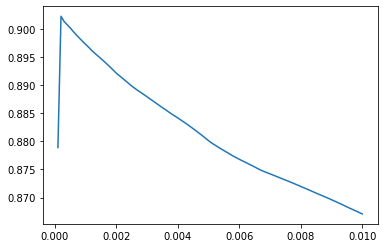

In [115]:
plt.plot(a_array, auc_list)

In [117]:
a = a_array[np.argmax(auc_list)]
alpha = a * N * np.ones(K)
logit_res = logit_mod.fit_regularized(method = 'l1', alpha = alpha)
print(logit_res.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4048077263604019
            Iterations: 478
            Function evaluations: 479
            Gradient evaluations: 478
                           Logit Regression Results                           
Dep. Variable:               SEGRADES   No. Observations:                15826
Model:                          Logit   Df Residuals:                    15678
Method:                           MLE   Df Model:                          147
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:                  0.4304
Time:                        10:40:33   Log-Likelihood:                -6248.7
converged:                       True   LL-Null:                       -10970.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [119]:
logit_res_file = open('./logit_res_file.txt', 'w')
print(logit_res.summary(), file = logit_res_file)
logit_res_file.close()

In [120]:
y_train_score = logit_res.predict(X_train_upd_0)
y_train_hat = y_train_score > 0.5
print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7913
           1       0.83      0.81      0.82      7913

    accuracy                           0.82     15826
   macro avg       0.82      0.82      0.82     15826
weighted avg       0.82      0.82      0.82     15826



AUC: 0.9022385151526772


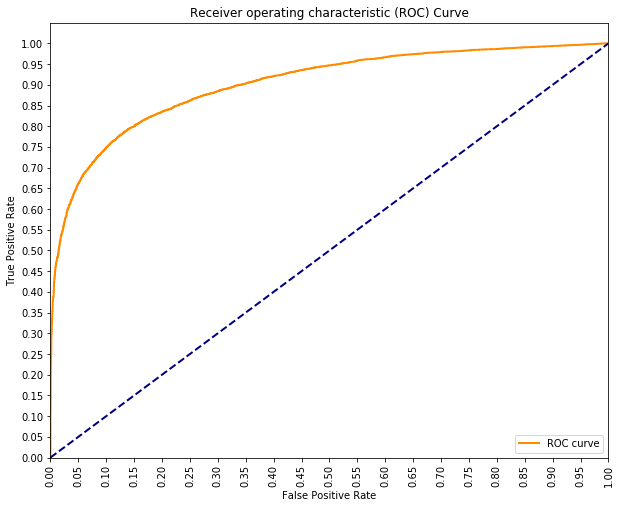

In [121]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_score)
print('AUC: {}'.format(auc(fpr, tpr)))
roc_plot(fpr, tpr)

### Test

In [122]:
X_test_upd = X_test[X_train_upd.columns]
X_test_upd_0 = sm.add_constant(X_test_upd)

In [123]:
y_test_score = logit_res.predict(X_test_upd_0)
y_test_hat = y_test_score > 0.5
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.39      0.65      0.49       327
           1       0.94      0.83      0.88      1979

    accuracy                           0.81      2306
   macro avg       0.66      0.74      0.69      2306
weighted avg       0.86      0.81      0.83      2306



AUC: 0.8313700583960331


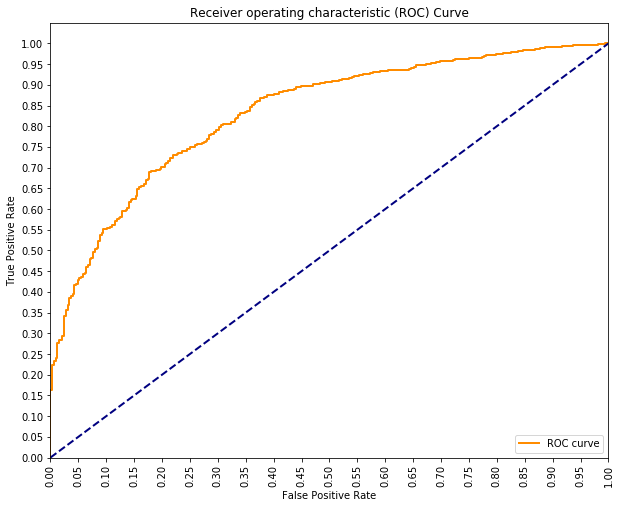

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
print('AUC: {}'.format(auc(fpr, tpr)))
roc_plot(fpr, tpr)